### All clones in baseline vs longitudinal visits

In [1]:
library(data.table)

In [2]:
# set working directory
setwd("/medpop/esp2/mesbah/projects/ch_progression/aric/pheno/")

In [6]:
    # pheno base/longit
    # N = 4,189
aric_baseline_n_v05 <- fread("aric_baseline_n_v05_N10881.pheno_ch_status.23Mar2023.csv", header=T)

    # qcd CH variants with phenotypes
ch_var_in_baseline_qcd.pheno <- fread("ch_var_in_baseline_qcd_pheno.23Mar2023.csv", header = T)

ch_var_in_v05_qcd.pheno <- fread("ch_var_in_v05_qcd_pheno.23Mar2023.csv", header = T)

    # pre-qc CH variants 
ch_var_in_baseline <- fread("../Returned_CH_call/baseline_CH_variants_in_aric_hiseq_novaseq_samevisit.maxDP_noDup.plusPileup.2023Jan30.csv", header = T)

ch_var_in_v05 <- fread("../Returned_CH_call/ch_var_in_v05.plusPileup.2023Jan30.csv", header = T)

In [9]:
#####################
## Expanded/shrinked CH
#####################
## 
  ## All CH Variant observed in Visit 05 
expansion.CH_v_b_v5_all <- merge(ch_var_in_v05_qcd.pheno, 
                                 ch_var_in_baseline[,c(10:15,22,24,25)], 
                                 by="varID_GWASID", 
                                 all.x=T)
## var.x="longitudianl"
## var.y="baseline"
nrow(expansion.CH_v_b_v5_all)
summary(expansion.CH_v_b_v5_all$VAF.x)
summary(expansion.CH_v_b_v5_all$VAF.y)


[1] 1302

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0200  0.0560  0.0895  0.1318  0.1770  0.7500 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.007   0.044   0.077   0.112   0.131   0.563     950 

In [10]:
# Add 0.0001 where VAF is missing
expansion.CH_v_b_v5_all$VAF.y[is.na(expansion.CH_v_b_v5_all$VAF.y)] <- 0.0001
summary(expansion.CH_v_b_v5_all$VAF.y)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00010 0.00010 0.00010 0.03036 0.02000 0.56300 

In [15]:
######
### Only observed in Baseline samples [missing in qcd V05]
######
expansion.CH_baseAll_n_V05 <- merge(ch_var_in_baseline_qcd.pheno, 
                                 ch_var_in_v05[,c(10:15,23,24)], 
                                 by="varID_GWASID", 
                                 all.x=T)
## var.x="baseline" 
## var.y="longitudianl"
nrow(expansion.CH_baseAll_n_V05)
summary(expansion.CH_baseAll_n_V05$VAF.x)
summary(expansion.CH_baseAll_n_V05$VAF.y)

[1] 576

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0200  0.0500  0.0730  0.1006  0.1170  0.5630 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.0100  0.0830  0.1720  0.1932  0.2710  0.5700     269 

In [16]:
# Add 0.0001 where VAF is missing
expansion.CH_baseAll_n_V05$VAF.y[is.na(expansion.CH_baseAll_n_V05$VAF.y)] <- 0.0001
summary(expansion.CH_baseAll_n_V05$VAF.y)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0001  0.0001  0.0430  0.1030  0.1847  0.5700 

In [23]:
table(expansion.CH_baseAll_n_V05$varID_GWASID %in% expansion.CH_v_b_v5_all$varID_GWASID)


FALSE  TRUE 
  277   299 

In [24]:
# Exclude 299 variants overlapping with V05
expansion.CH_baseAll_n_V05 <- subset(expansion.CH_baseAll_n_V05, !(expansion.CH_baseAll_n_V05$varID_GWASID %in% expansion.CH_v_b_v5_all$varID_GWASID) )
nrow(expansion.CH_baseAll_n_V05)
table(expansion.CH_baseAll_n_V05$varID_GWASID %in% expansion.CH_v_b_v5_all$varID_GWASID)

[1] 277


FALSE 
  277 

In [31]:
summary(expansion.CH_v_b_v5_all$VAF.x)
summary(expansion.CH_v_b_v5_all$VAF.y)
cat("Base\n")
summary(expansion.CH_baseAll_n_V05$VAF.x)
summary(expansion.CH_baseAll_n_V05$VAF.y)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0200  0.0560  0.0895  0.1318  0.1770  0.7500 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00010 0.00010 0.00010 0.03036 0.02000 0.56300 

Base


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.02000 0.04200 0.06200 0.07159 0.08900 0.35600 

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0001000 0.0001000 0.0001000 0.0008913 0.0001000 0.0410000 

In [44]:
## Manually append two files
# fwrite(expansion.CH_v_b_v5_all, "expansion.CH_v_b_v5_all.23Mar2023.csv", 
 #       row.names = F, col.names = T, sep=",", na = "NA")

#  fwrite(expansion.CH_baseAll_n_V05, "expansion.CH_baseAll_n_V05.23Mar2023.csv",
 #       row.names = F, col.names = T, sep=",", na = "NA")

In [3]:
## Combined ch var file
com.expansion.CH_v_b_v5_all  <- fread("combined.expansion.CH_v_b_v5_all.23Mar2023.csv", header=T) 
#names(expansion.CH_baseAll_n_V05)

In [4]:
 str(com.expansion.CH_v_b_v5_all)

Classes 'data.table' and 'data.frame':	1579 obs. of  125 variables:
 $ varID_GWASID        : chr  "chr10_87931087_GAGGT_G_A07861" "chr10_87933249_AAGGTAAGTTATTTTTTGATGTT_A_A06550" "chr10_87960969_G_T_A04739" "chr11_119278221_G_A_A14253" ...
 $ GWAS_ID             : chr  "A07861" "A06550" "A04739" "A14253" ...
 $ CHR                 : chr  "chr10" "chr10" "chr10" "chr11" ...
 $ POS                 : int  87931087 87933249 87960969 119278221 119278257 119278263 119278269 119278274 119278281 119278289 ...
 $ REF                 : chr  "GAGGT" "AAGGTAAGTTATTTTTTGATGTT" "G" "G" ...
 $ ALT                 : chr  "G" "A" "T" "A" ...
 $ Gene                : chr  "PTEN" "PTEN" "PTEN" "CBL" ...
 $ AD.v5               : chr  "63,50" "77,3" "142,6" "136,5" ...
 $ VAF.v5              : num  0.449 0.044 0.037 0.045 0.367 0.297 0.071 0.071 0.077 0.086 ...
 $ DP.v5               : int  113 80 148 141 69 126 100 110 110 103 ...
 $ AD.Alt.v5           : int  50 3 6 5 23 34 5 6 9 7 ...
 $ FR.Alt.v5     

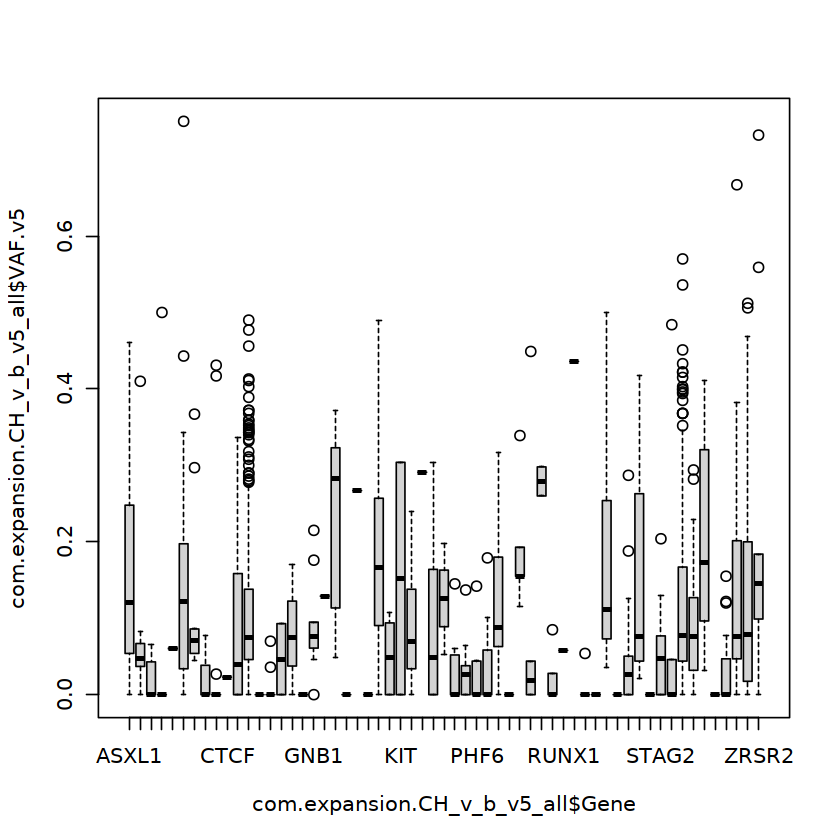

In [5]:
boxplot(com.expansion.CH_v_b_v5_all$VAF.v5 ~ com.expansion.CH_v_b_v5_all$Gene)

In [48]:
sort(table(com.expansion.CH_v_b_v5_all$Gene))


   CTCF     EED   GATA1    IDH1   IKZF1   IKZF2   IKZF3     MPL PRPF40B   RUNX1 
      1       1       1       1       1       1       1       1       1       1 
 SETBP1     WT1    BRAF    ETV6     KIT  PTPN11    EZH2    CBLB    NRAS  SETDB1 
      1       1       2       2       2       2       3       4       4       4 
   SMC3    BCOR  BCORL1    KRAS   PRPF8   SUZ12    PTEN   RAD21   STAG1   ASXL2 
      4       5       5       5       5       5       6       6       6       7 
   CUX1    IDH2    PHF6   SETD2   KDM6A    NXF1   ZRSR2     CBL   EP300    GNB1 
      7       7       7       8       9       9       9      10      10      10 
    NF1   U2AF1   BRCC3  CREBBP    PHIP    JAK2   PDS5B   SRCAP   STAG2  ZBTB33 
     12      12      15      16      16      19      21      23      28      28 
  SRSF2   YLPM1  ZNF318    TP53   PPM1D   SF3B1   ASXL1    TET2  DNMT3A 
     29      29      32      37      42      42     103     306     594 

In [50]:
sort(table(com.expansion.CH_v_b_v5_all$NonsynOI), decreasing = T)


             nan            R882H       G646Wfs*12            V617F 
             151               27               20               19 
                             P95H            K700E            R882C 
              18               17               16               14 
          I1873T            R771X             P95L       E635Rfs*15 
              12               11               10                9 
            K57E            R552X            E342X            Q157P 
               9                9                8                8 
           R320X            R326C            R736H            W313X 
               8                8                8                7 
           K666N            R140Q            R326H            Y591X 
               6                6                6                6 
          E1033X             G12D            R635W            V657M 
               5                5                5                5 
           W330X            Y660C

In [6]:
com.expansion.CH_v_b_v5_all$dAge <- com.expansion.CH_v_b_v5_all$Age - com.expansion.CH_v_b_v5_all$age_base
summary(com.expansion.CH_v_b_v5_all$dAge)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   6.00   20.00   21.00   20.33   21.00   27.00 

In [7]:
com.expansion.CH_v_b_v5_all$dVAF <- com.expansion.CH_v_b_v5_all$VAF.v5 - com.expansion.CH_v_b_v5_all$VAF.v2
summary(com.expansion.CH_v_b_v5_all$dVAF)
## change from "1"
com.expansion.CH_v_b_v5_all$pctVAF <- (com.expansion.CH_v_b_v5_all$VAF.v5/com.expansion.CH_v_b_v5_all$VAF.v2 -1)
summary(com.expansion.CH_v_b_v5_all$pctVAF)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.35590  0.02090  0.06090  0.07124  0.11645  0.74990 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
  -1.000    0.244  439.000  672.829  909.000 7499.000 

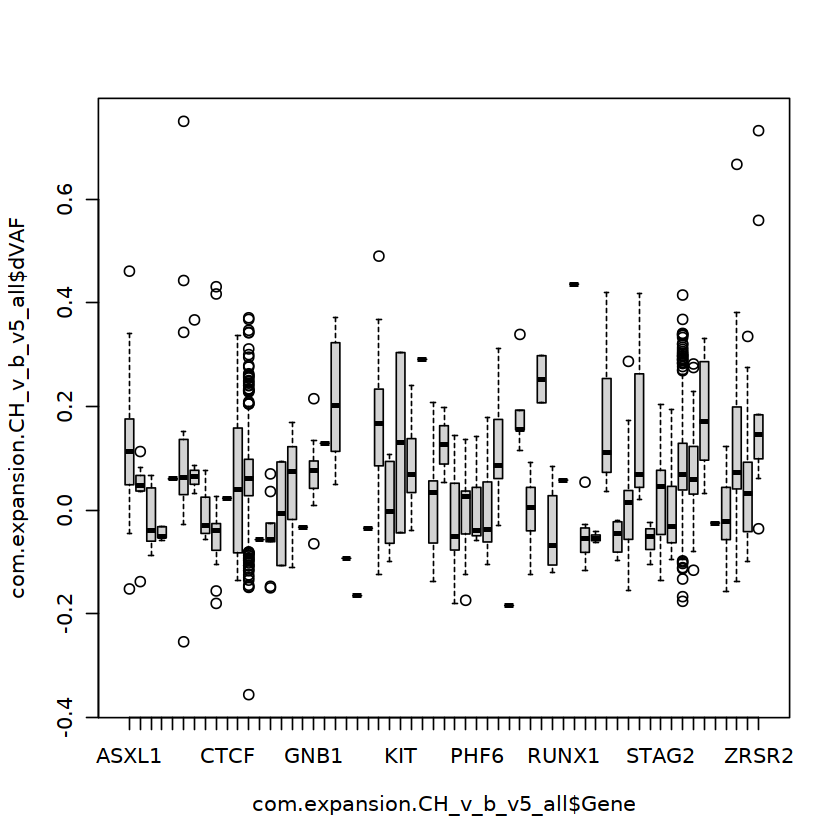

In [8]:
boxplot(com.expansion.CH_v_b_v5_all$dVAF ~ com.expansion.CH_v_b_v5_all$Gene)

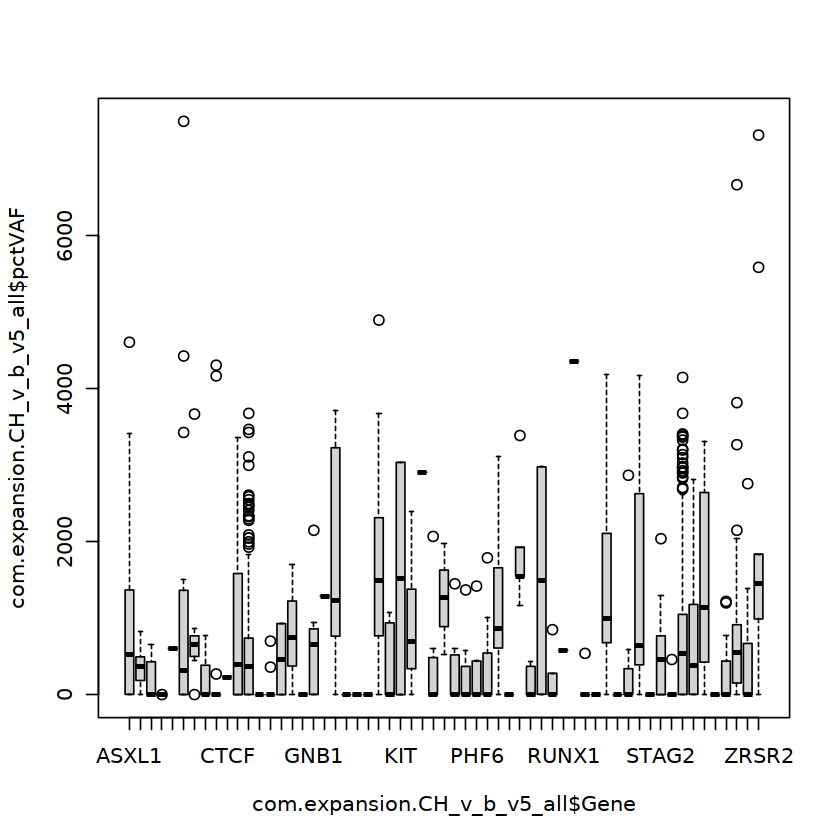

In [9]:
boxplot(com.expansion.CH_v_b_v5_all$pctVAF ~ com.expansion.CH_v_b_v5_all$Gene)

      Min.    1st Qu.     Median       Mean    3rd Qu.       Max. 
-0.0223167  0.0009762  0.0029500  0.0035806  0.0057650  0.1071286 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-1.2001  0.0108  0.2900  0.1519  0.3368  1.2747 

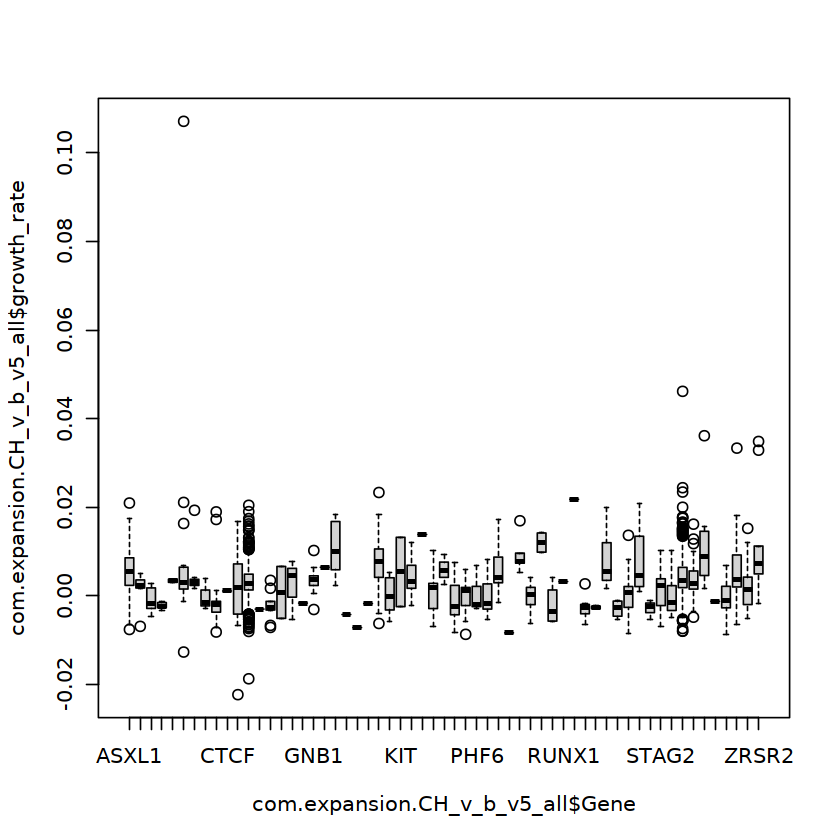

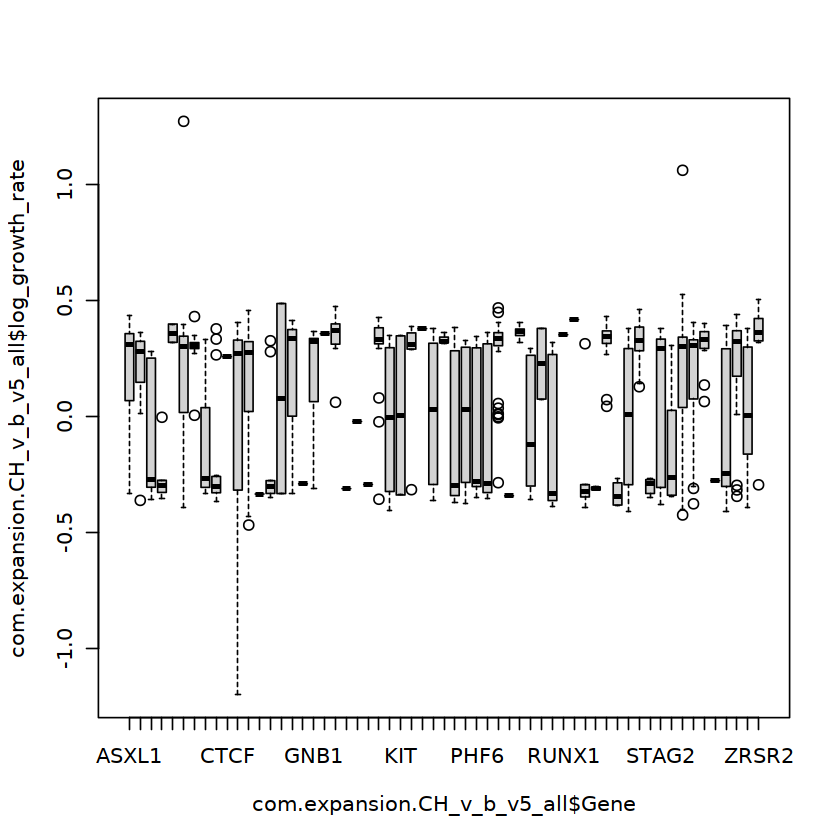

In [60]:
# dvaf
com.expansion.CH_v_b_v5_all$growth_rate <- (com.expansion.CH_v_b_v5_all$dVAF/com.expansion.CH_v_b_v5_all$dAge)

com.expansion.CH_v_b_v5_all$log_growth_rate <- (log(com.expansion.CH_v_b_v5_all$VAF.v5/com.expansion.CH_v_b_v5_all$VAF.v2)/com.expansion.CH_v_b_v5_all$dAge)

summary(com.expansion.CH_v_b_v5_all$growth_rate)

summary(com.expansion.CH_v_b_v5_all$log_growth_rate)

boxplot(com.expansion.CH_v_b_v5_all$growth_rate ~ com.expansion.CH_v_b_v5_all$Gene)

boxplot(com.expansion.CH_v_b_v5_all$log_growth_rate ~ com.expansion.CH_v_b_v5_all$Gene)

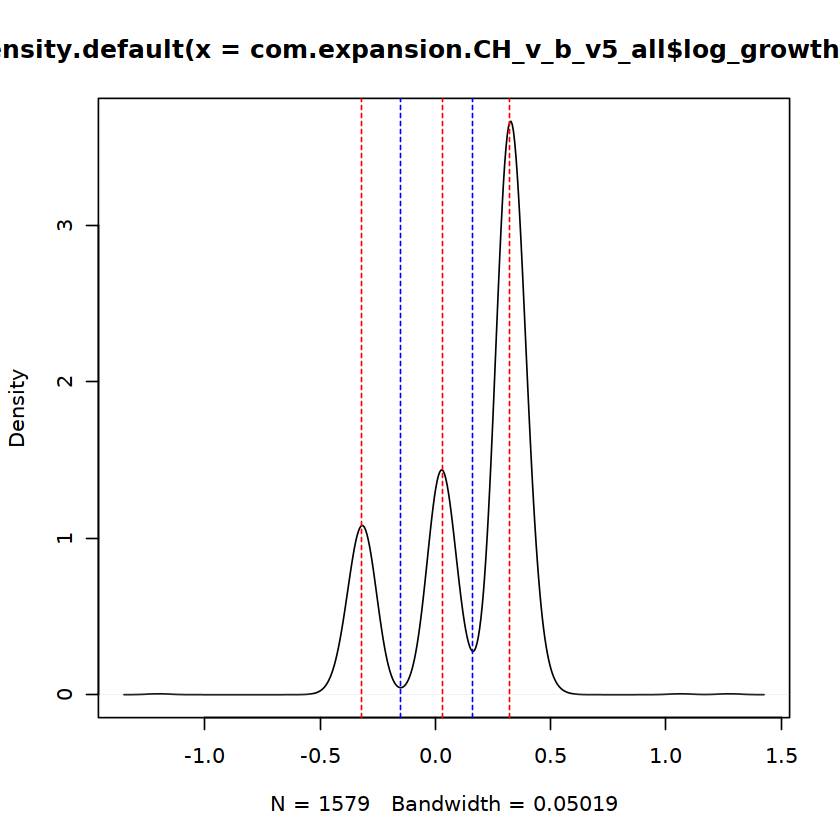

In [183]:
plot(density(com.expansion.CH_v_b_v5_all$log_growth_rate))
abline(v = c(-0.32,0.029,0.32), col = "red", lty = 2)
#abline(v = c(-0.416,-0.224,-0.091,0.149,0.19,0.49), col = "blue", lty = 2)
abline(v = c(-0.15,0.16), col = "blue", lty = 2)

In [187]:
# Estimate the density of the data
my_dens <- density(com.expansion.CH_v_b_v5_all$log_growth_rate)

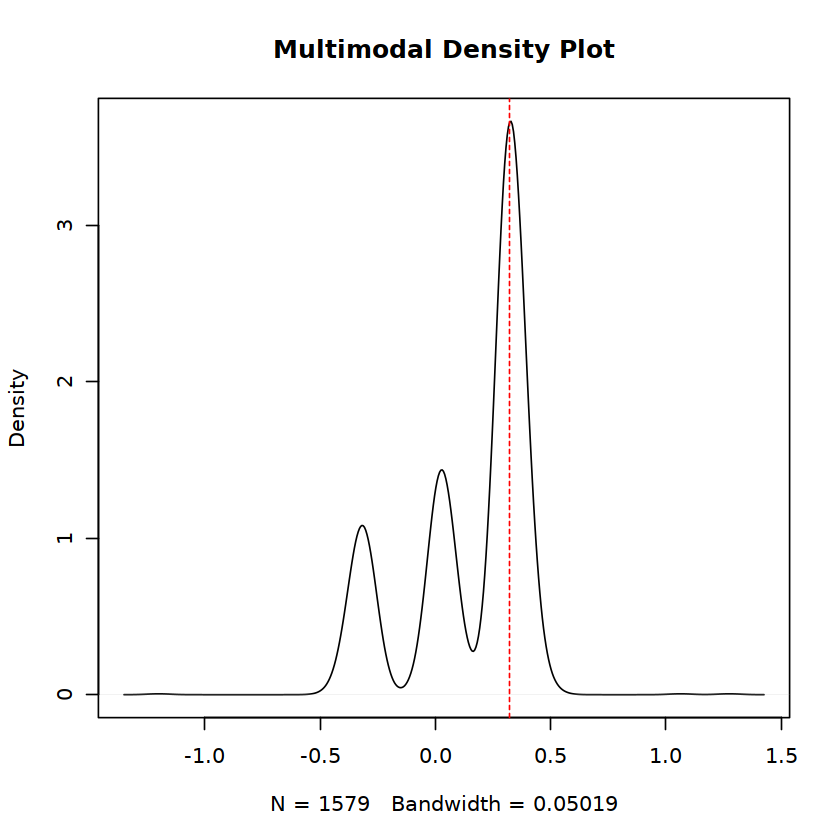

In [188]:
# Identify the maximum point(s) of the density function
max_idx <- which(my_dens$y == max(my_dens$y))
modes <- my_dens$x[findInterval(max_idx, c(1:length(my_dens$x) + 0.5))] 

# Plot the density function with the mode(s) marked
plot(my_dens, main = "Multimodal Density Plot")
abline(v = modes, col = "red", lty = 2)

In [68]:
## Mixtures of multiple distribution 
library(mixtools)
# Fit a Gaussian mixture model with three components
fit_k3 <- normalmixEM(com.expansion.CH_v_b_v5_all$log_growth_rate, k = 3)

mixtools package, version 1.2.0, Released 2020-02-05
This package is based upon work supported by the National Science Foundation under Grant No. SES-0518772.




number of iterations= 517 


In [195]:
fit_k3_fixd <- normalmixEM(com.expansion.CH_v_b_v5_all$log_growth_rate, k=3, mean.constr = c(-0.32,0.029,0.32), 
                    sd.constr = c(0.036, 0.037, 0.043))

number of iterations= 3 


In [196]:
summary(fit_k3_fixd)

summary of normalmixEM object:
          comp 1   comp 2   comp 3
lambda  0.170361 0.226317 0.603322
mu     -0.320000 0.029000 0.320000
sigma   0.036000 0.037000 0.043000
loglik at estimate:  584.1762 


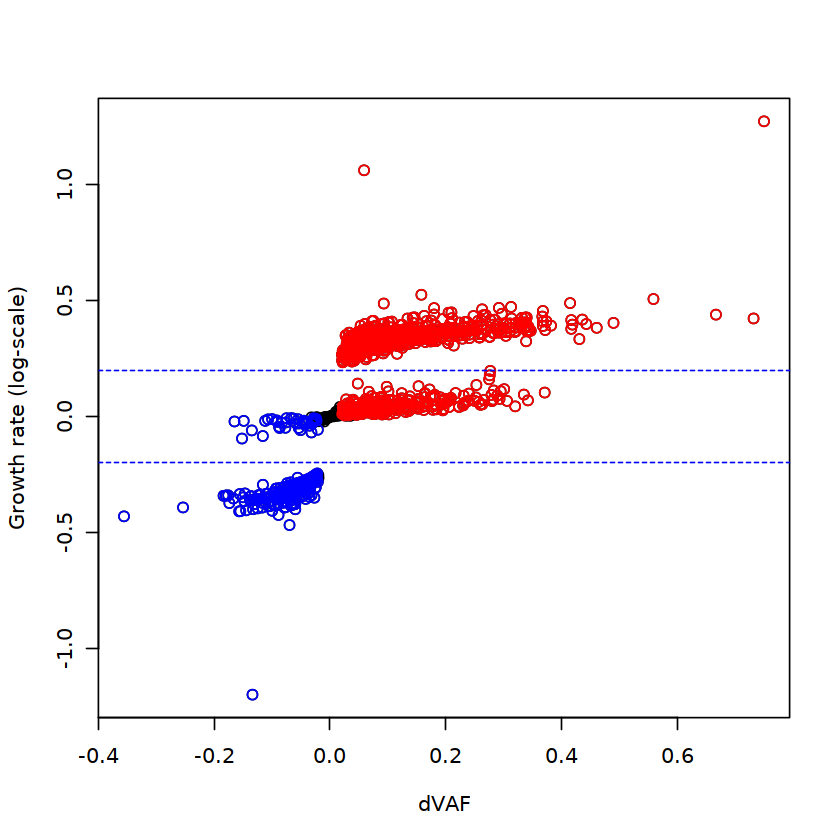

In [215]:
plot(x=com.expansion.CH_v_b_v5_all$dVAF, y=com.expansion.CH_v_b_v5_all$log_growth_rate,   
     xlab = "dVAF", ylab = "Growth rate (log-scale)")
points(com.expansion.CH_v_b_v5_all$dVAF[com.expansion.CH_v_b_v5_all$log_growth_rate>0 & com.expansion.CH_v_b_v5_all$pctVAF>=.1 & com.expansion.CH_v_b_v5_all$dVAF>=0.02], com.expansion.CH_v_b_v5_all$log_growth_rate[com.expansion.CH_v_b_v5_all$log_growth_rate>0 & com.expansion.CH_v_b_v5_all$pctVAF>=.1 & com.expansion.CH_v_b_v5_all$dVAF>=0.02], col="red")
points(com.expansion.CH_v_b_v5_all$dVAF[com.expansion.CH_v_b_v5_all$log_growth_rate<0 & com.expansion.CH_v_b_v5_all$pctVAF<=-.1 & com.expansion.CH_v_b_v5_all$dVAF<=-0.02], com.expansion.CH_v_b_v5_all$log_growth_rate[com.expansion.CH_v_b_v5_all$log_growth_rate<0 & com.expansion.CH_v_b_v5_all$pctVAF<=-.1 & com.expansion.CH_v_b_v5_all$dVAF<=-0.02], col="blue")

abline(h = c(-0.2,0.2), col = "blue", lty = 2)

##### three distinct groups
*Explanation:* 
Top cluster: CH detected in visit 05, not detected in baseline. imputed clones at base with vaf = .0001

middle cluster: detected in both visits

Bottom cluster: only detected in baseline visit

In [218]:
cat("Growing clones\n")
table(com.expansion.CH_v_b_v5_all$log_growth_rate>0 & com.expansion.CH_v_b_v5_all$pctVAF>=.1 & com.expansion.CH_v_b_v5_all$dVAF>=0.02)

cat("shrinking clones\n")
table(com.expansion.CH_v_b_v5_all$log_growth_rate<0 & com.expansion.CH_v_b_v5_all$pctVAF<=-.1 & com.expansion.CH_v_b_v5_all$dVAF<=-0.02)

cat("static clones\n")
table( !((com.expansion.CH_v_b_v5_all$log_growth_rate<0 & com.expansion.CH_v_b_v5_all$pctVAF<=-.1 & com.expansion.CH_v_b_v5_all$dVAF<=-0.02) |
     (com.expansion.CH_v_b_v5_all$log_growth_rate>0 & com.expansion.CH_v_b_v5_all$pctVAF>=.1 & com.expansion.CH_v_b_v5_all$dVAF>=0.02)) )


Growing clones



FALSE  TRUE 
  396  1183 

shrinking clones



FALSE  TRUE 
 1272   307 

static clones



FALSE  TRUE 
 1490    89 

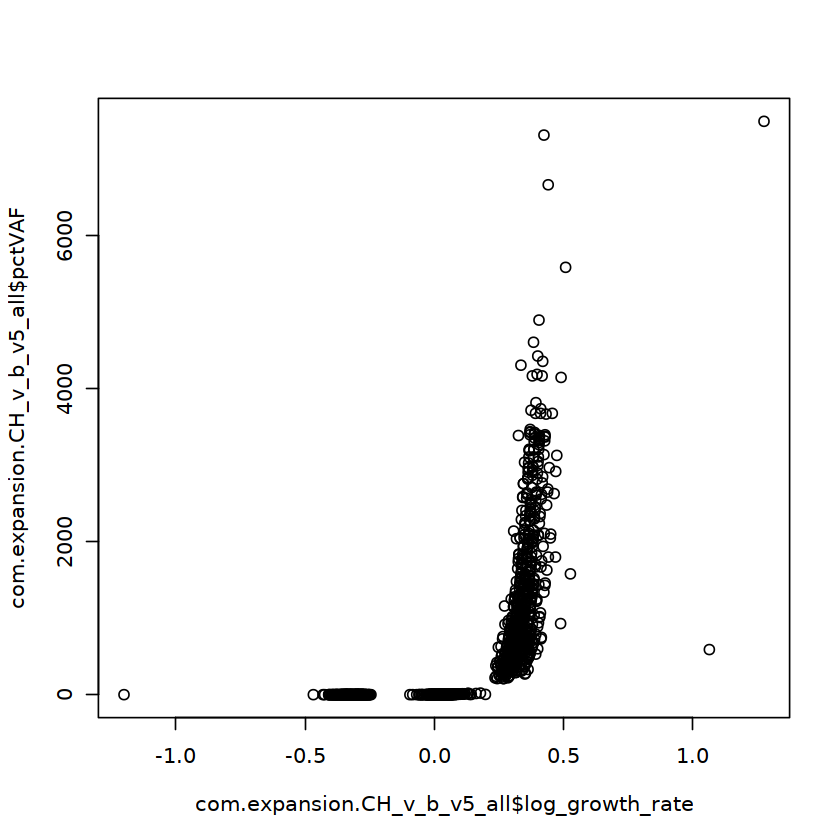

In [205]:
plot(com.expansion.CH_v_b_v5_all$log_growth_rate, com.expansion.CH_v_b_v5_all$pctVAF)

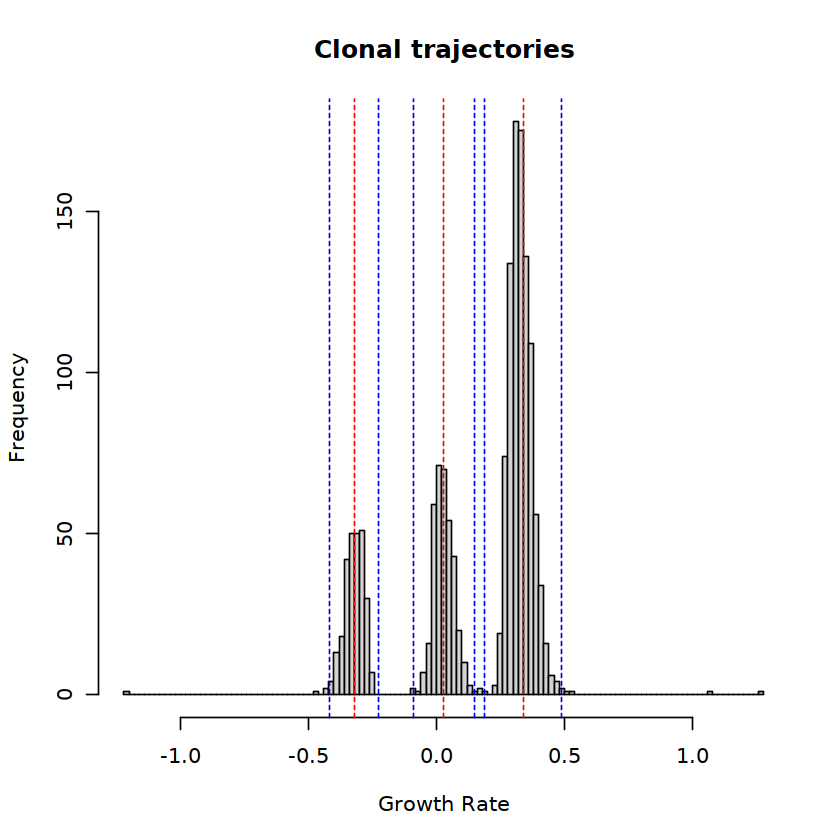

In [170]:
hist(com.expansion.CH_v_b_v5_all$log_growth_rate, breaks = 100, xlab = "Growth Rate", main="Clonal trajectories")
abline(v = c(-0.32,0.029,0.34), col = "red", lty = 2)
abline(v = c(-0.416,-0.224,-0.091,0.149,0.19,0.49), col = "blue", lty = 2)

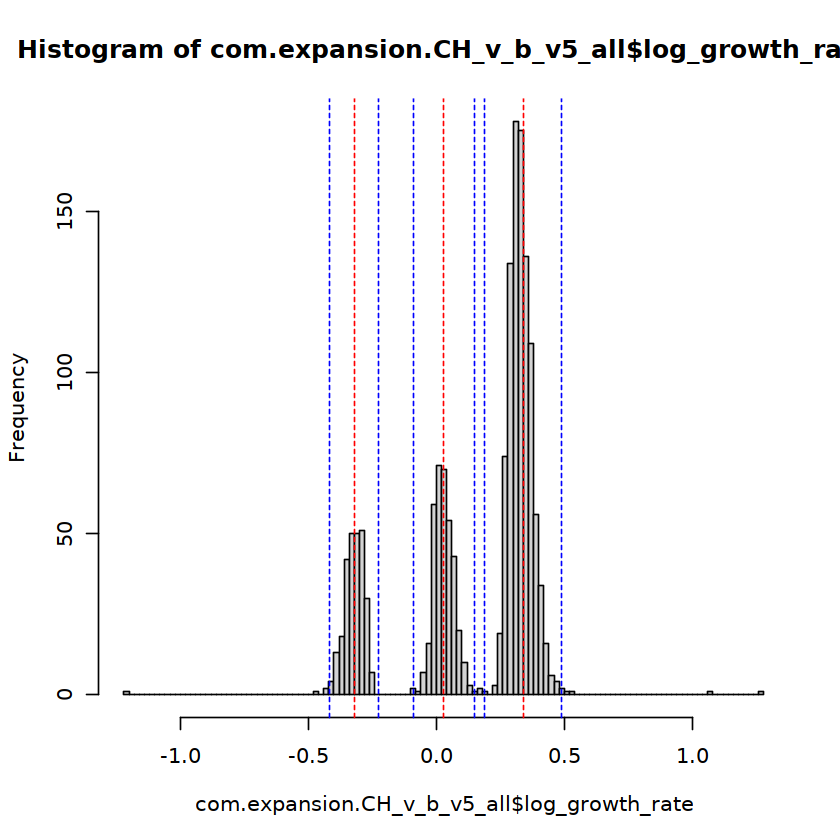

In [166]:
# Plot the histogram of the data with the boundaries marked
hist(com.expansion.CH_v_b_v5_all$log_growth_rate, breaks = 100)
abline(v = c(-0.32,0.029,0.34), col = "red", lty = 2)
abline(v = c(-0.416,-0.224,-0.091,0.149,0.19,0.49), col = "blue", lty = 2)

In [14]:
## Gene Gropu: D, T, A, DDR, SF, Other
com.expansion.CH_v_b_v5_all$Gene_Group <- ifelse(com.expansion.CH_v_b_v5_all$Gene =="DNMT3A", "DNMT3A",
                                                 ifelse(com.expansion.CH_v_b_v5_all$Gene=="TET2", "TET2",
                                                        ifelse(com.expansion.CH_v_b_v5_all$Gene=="ASXL1", "ASXL1",
                                                               ifelse(com.expansion.CH_v_b_v5_all$Gene %in% c("PPM1D", "TP53"), "DDR", 
                                                                      ifelse(com.expansion.CH_v_b_v5_all$Gene %in% c("SF3B1", "SRSF2","U2AF1", "ZRSR2"), "SF","Other")))))
table(com.expansion.CH_v_b_v5_all$Gene_Group)


 ASXL1    DDR DNMT3A  Other     SF   TET2 
   103     79    594    405     92    306 

In [21]:
# count>20              
com.expansion.CH_v_b_v5_all$Gene_Group_2 <- ifelse(com.expansion.CH_v_b_v5_all$Gene =="DNMT3A", "DNMT3A",
                                                 ifelse(com.expansion.CH_v_b_v5_all$Gene=="TET2", "TET2",
                                                        ifelse(com.expansion.CH_v_b_v5_all$Gene=="ASXL1", "ASXL1",
                                                               ifelse(com.expansion.CH_v_b_v5_all$Gene=="SF3B1", "SF3B1", 
                                                                      ifelse(com.expansion.CH_v_b_v5_all$Gene=="PPM1D", "PPM1D",
                                                                             ifelse(com.expansion.CH_v_b_v5_all$Gene=="TP53", "TP53",
                                                                                    ifelse(com.expansion.CH_v_b_v5_all$Gene=="ZNF318", "ZNF318",
                                                                                           ifelse(com.expansion.CH_v_b_v5_all$Gene=="YLPM1", "YLPM1",
                                                                                                  ifelse(com.expansion.CH_v_b_v5_all$Gene=="SRSF2", "SRSF2",
                                                                                                         ifelse(com.expansion.CH_v_b_v5_all$Gene=="ZBTB33", "ZBTB33",
                                                                                                                ifelse(com.expansion.CH_v_b_v5_all$Gene=="STAG2", "STAG2",
                                                                                                                       ifelse(com.expansion.CH_v_b_v5_all$Gene=="SRCAP", "SRCAP",
                                                                                                                              ifelse(com.expansion.CH_v_b_v5_all$Gene=="PDS5B", "PDS5B","Other")))))))))))))
sort(table(com.expansion.CH_v_b_v5_all$Gene_Group_2))


 PDS5B  SRCAP  STAG2 ZBTB33  SRSF2  YLPM1 ZNF318   TP53  PPM1D  SF3B1  ASXL1 
    21     23     28     28     29     29     32     37     42     42    103 
 Other   TET2 DNMT3A 
   265    306    594 

In [39]:
# DNMT3A: "R882H" (27); "R882C" (14)
# TET2 "I1873T" (12)
# ASXL1 "G646Wfs*12" (20) "E635Rfs*15" (9)
# SF3B1 "K700E" (16) c("K666N", "K666R", "K666E", "K666T", "K666Q")
# PPM1D "R552X" (9)
# SRSF2 "P95H" (17) "P95L" (10) "P95R" (1) "Y44H" (1)
# JAK2 "V617F" (19)
# U2AF1 "Q157P" (8) "Q157R" (3) "S34F" (1)
sort(table(com.expansion.CH_v_b_v5_all$NonsynOI[com.expansion.CH_v_b_v5_all$Gene=="U2AF1"]), decreasing = T)


Q157P Q157R  S34F 
    8     3     1 

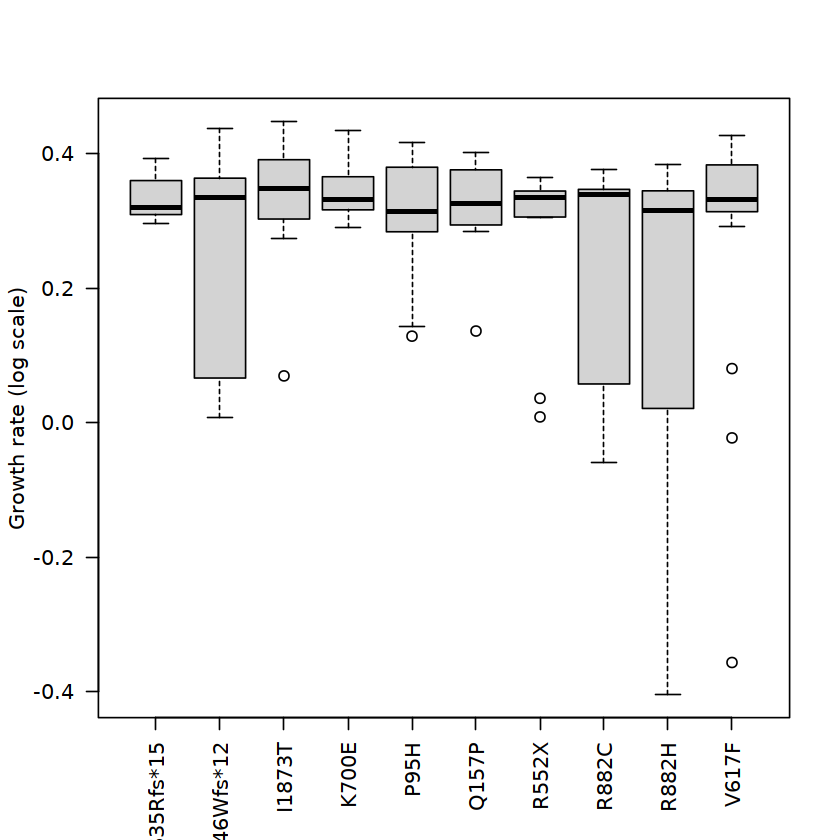

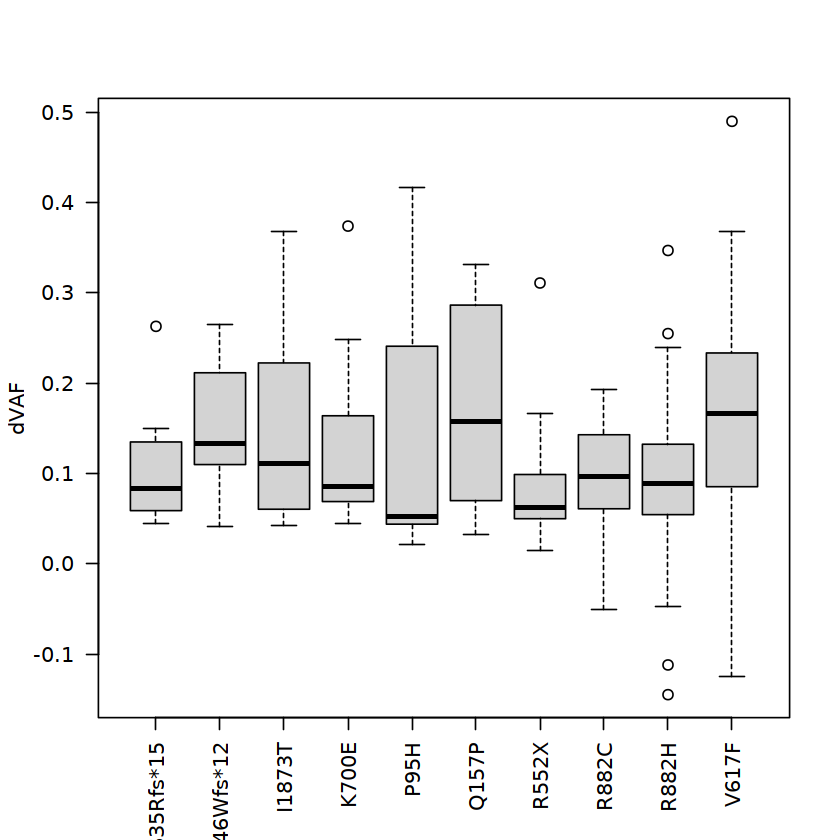

In [61]:
boxplot(com.expansion.CH_v_b_v5_all$log_growth_rate[com.expansion.CH_v_b_v5_all$NonsynOI %in% c("R882H", "R882C", "I1873T", "G646Wfs*12", "E635Rfs*15", "K700E", "V617F", "P95H", "R552X", "Q157P")] ~ com.expansion.CH_v_b_v5_all$NonsynOI[com.expansion.CH_v_b_v5_all$NonsynOI %in% c("R882H", "R882C", "I1873T", "G646Wfs*12", "E635Rfs*15", "K700E", "V617F", "P95H", "R552X", "Q157P")], las=2, xlab ="", ylab="Growth rate (log scale)")

boxplot(com.expansion.CH_v_b_v5_all$dVAF[com.expansion.CH_v_b_v5_all$NonsynOI %in% c("R882H", "R882C", "I1873T", "G646Wfs*12", "E635Rfs*15", "K700E", "V617F", "P95H", "R552X", "Q157P")] ~ com.expansion.CH_v_b_v5_all$NonsynOI[com.expansion.CH_v_b_v5_all$NonsynOI %in% c("R882H", "R882C", "I1873T", "G646Wfs*12", "E635Rfs*15", "K700E", "V617F", "P95H", "R552X", "Q157P")], las=2, xlab ="", ylab="dVAF")

Warning message in bplt(at[i], wid = width[i], stats = z$stats[, i], out = z$out[z$group == :
"Outlier (-Inf) in boxplot 3 is not drawn"
Warning message in bplt(at[i], wid = width[i], stats = z$stats[, i], out = z$out[z$group == :
"Outlier (-Inf) in boxplot 6 is not drawn"


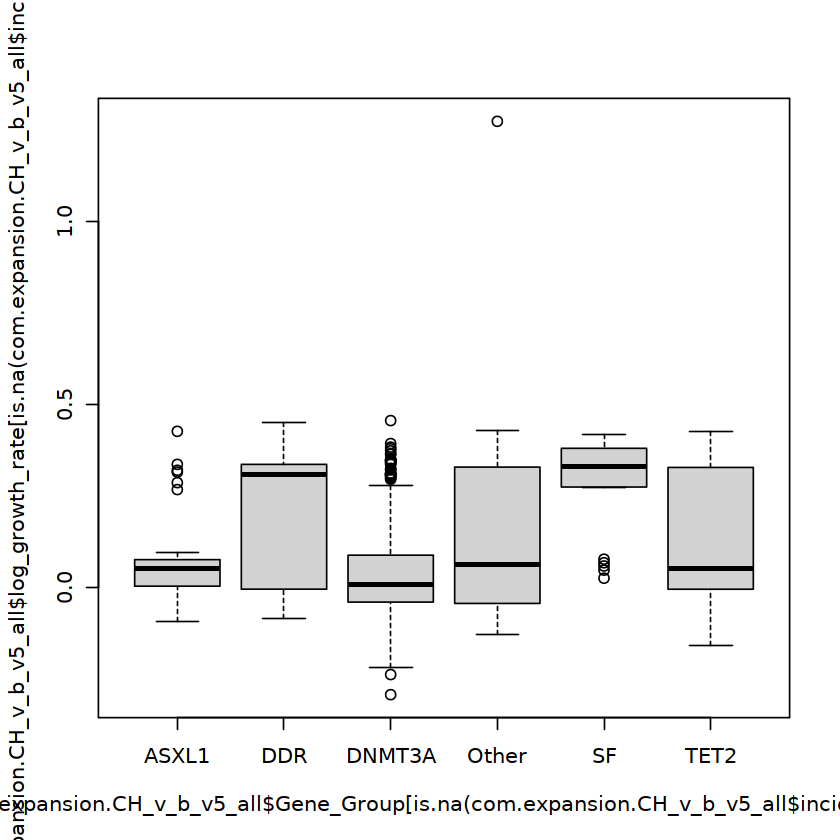

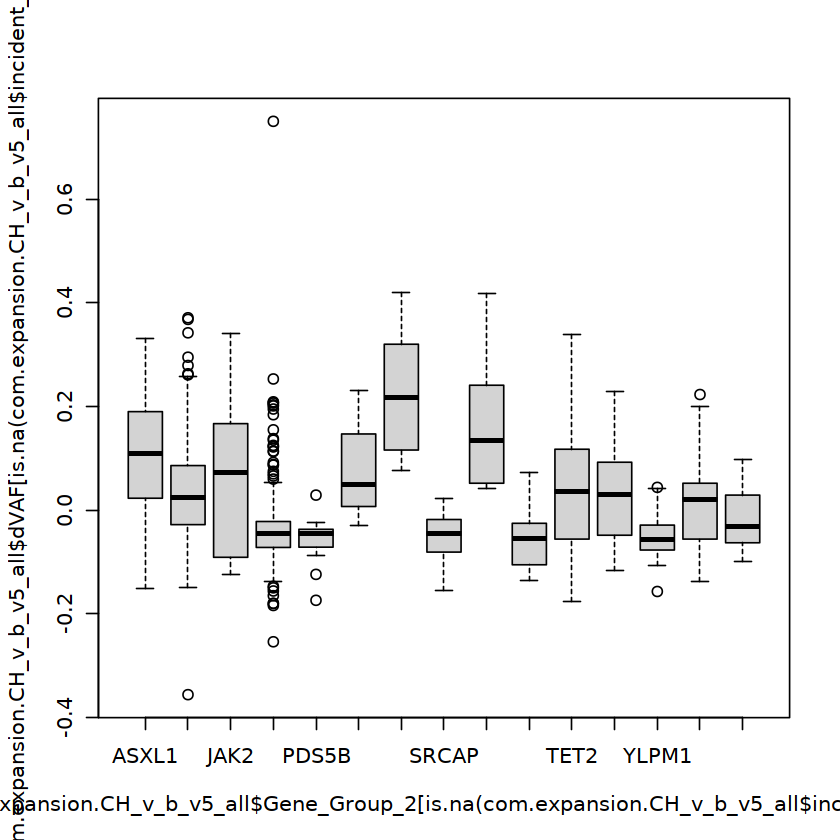

In [20]:
boxplot(com.expansion.CH_v_b_v5_all$log_growth_rate[is.na(com.expansion.CH_v_b_v5_all$incident_CH)] ~ com.expansion.CH_v_b_v5_all$Gene_Group[is.na(com.expansion.CH_v_b_v5_all$incident_CH)])
boxplot(com.expansion.CH_v_b_v5_all$dVAF[is.na(com.expansion.CH_v_b_v5_all$incident_CH)] ~ com.expansion.CH_v_b_v5_all$Gene_Group_2[is.na(com.expansion.CH_v_b_v5_all$incident_CH)])

In [18]:
table(com.expansion.CH_v_b_v5_all$incident_CH, exclude = NULL)


   1 <NA> 
 876  703 

In [12]:
summary(com.expansion.CH_v_b_v5_all$VAF.v5, com.expansion.CH_v_b_v5_all$VAF.v2)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0001  0.0380  0.0720  0.1088  0.1495  0.7500 

In [241]:
nrow(com.expansion.CH_v_b_v5_all)
cat("all baseline CH\t",table(com.expansion.CH_v_b_v5_all$VAF.v2>=0.02),"\n")

cat("all visit 05 CH\t",table(com.expansion.CH_v_b_v5_all$VAF.v5>=0.02),"\n")

cat("VAF>=2% in both visit\t", table(com.expansion.CH_v_b_v5_all$VAF.v2>=0.02 & com.expansion.CH_v_b_v5_all$VAF.v5>=0.02), "\n")

cat("VAF>=2% in baseline only\t", table(com.expansion.CH_v_b_v5_all$VAF.v2>=0.02 & com.expansion.CH_v_b_v5_all$VAF.v5<0.02), "\n")

    # incident clones
cat("incident clones\t", table(com.expansion.CH_v_b_v5_all$VAF.v2<0.02 & com.expansion.CH_v_b_v5_all$VAF.v5>=0.02), "\n")

cat("clones\t", table(com.expansion.CH_v_b_v5_all$VAF.v2>1e-4 & com.expansion.CH_v_b_v5_all$VAF.v5>=0.02), "\n")


[1] 1579

all baseline CH	 972 607 
all visit 05 CH	 270 1309 
VAF>=2% in both visit	 1242 337 
VAF>=2% in baseline only	 1309 270 
incident clones	 607 972 
clones	 1220 359 


In [249]:
table(com.expansion.CH_v_b_v5_all$VAF.v2[com.expansion.CH_v_b_v5_all$VAF.v2<0.02])


1e-04 0.007 0.009  0.01 0.011 0.012 0.013 0.014 0.016 0.017 0.018 0.019 
  950     1     2     1     2     2     2     1     4     1     3     3 

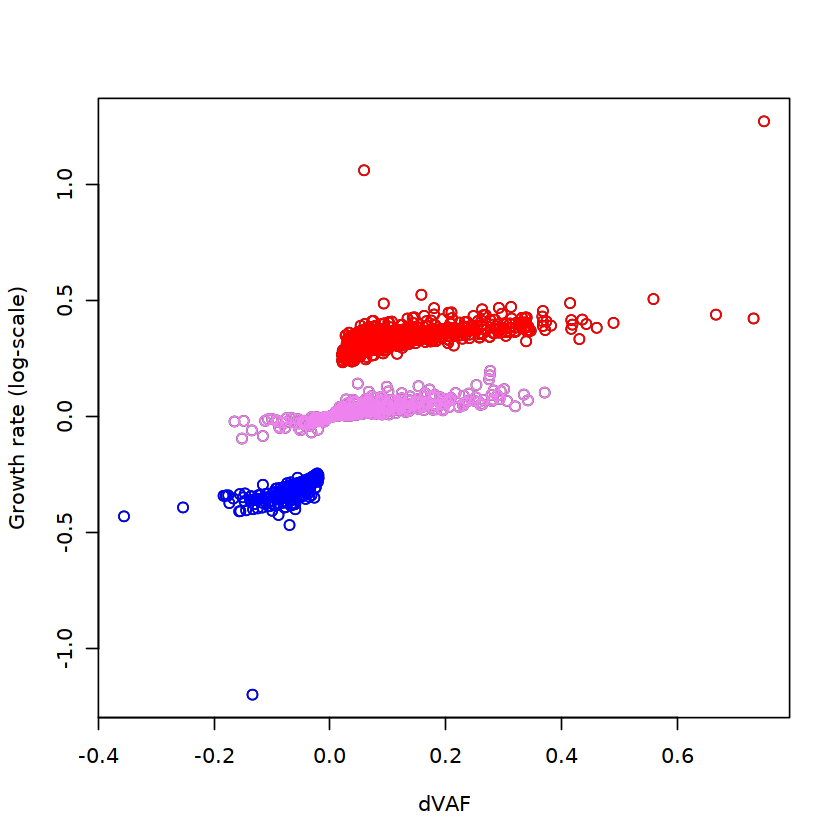

In [251]:
plot(x=com.expansion.CH_v_b_v5_all$dVAF, y=com.expansion.CH_v_b_v5_all$log_growth_rate,   
     xlab = "dVAF", ylab = "Growth rate (log-scale)")
 points(x=com.expansion.CH_v_b_v5_all$dVAF[com.expansion.CH_v_b_v5_all$VAF.v2==1e-4], 
        y=com.expansion.CH_v_b_v5_all$log_growth_rate[com.expansion.CH_v_b_v5_all$VAF.v2==1e-4], 
        col="red")

 points(x=com.expansion.CH_v_b_v5_all$dVAF[com.expansion.CH_v_b_v5_all$VAF.v5==1e-4], 
        y=com.expansion.CH_v_b_v5_all$log_growth_rate[com.expansion.CH_v_b_v5_all$VAF.v5==1e-4], 
        col="blue")

 points(x=com.expansion.CH_v_b_v5_all$dVAF[com.expansion.CH_v_b_v5_all$VAF.v2>1e-4 & com.expansion.CH_v_b_v5_all$VAF.v5>1e-4], 
        y=com.expansion.CH_v_b_v5_all$log_growth_rate[com.expansion.CH_v_b_v5_all$VAF.v2>1e-4 & com.expansion.CH_v_b_v5_all$VAF.v5>1e-4], 
        col="violet")
# points(com.expansion.CH_v_b_v5_all$dVAF[com.expansion.CH_v_b_v5_all$log_growth_rate<0 & com.expansion.CH_v_b_v5_all$pctVAF<=-.1 & com.expansion.CH_v_b_v5_all$dVAF<=-0.02], com.expansion.CH_v_b_v5_all$log_growth_rate[com.expansion.CH_v_b_v5_all$log_growth_rate<0 & com.expansion.CH_v_b_v5_all$pctVAF<=-.1 & com.expansion.CH_v_b_v5_all$dVAF<=-0.02], col="blue")

# abline(h = c(-0.2,0.2), col = "blue", lty = 2)

In [254]:
# both visit
summary(com.expansion.CH_v_b_v5_all$log_growth_rate[com.expansion.CH_v_b_v5_all$VAF.v2>1e-4 & 
                                                    com.expansion.CH_v_b_v5_all$VAF.v5>1e-4])
# incident CH
summary(com.expansion.CH_v_b_v5_all$log_growth_rate[com.expansion.CH_v_b_v5_all$VAF.v2<0.02])
# only baseline
summary(com.expansion.CH_v_b_v5_all$log_growth_rate[com.expansion.CH_v_b_v5_all$VAF.v5<0.02])

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-0.094577  0.002396  0.028421  0.030380  0.055701  0.197490 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.02023 0.29827 0.32539 0.32722 0.35735 1.27467 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-1.20007 -0.34352 -0.31811 -0.32337 -0.29299 -0.06834 

In [261]:
## Clone status based on detected/imputed VAF
com.expansion.CH_v_b_v5_all$Clone_status <- ifelse(com.expansion.CH_v_b_v5_all$VAF.v2<0.02 & com.expansion.CH_v_b_v5_all$VAF.v5>=0.02, "Incident", ifelse(com.expansion.CH_v_b_v5_all$VAF.v2>1e-4 & com.expansion.CH_v_b_v5_all$VAF.v5>1e-4, "Both", "Baseline"))

table(com.expansion.CH_v_b_v5_all$Clone_status )


Baseline     Both Incident 
     269      338      972 

In [265]:
## Growth status 
  # expanded = log_growth_rate>0 & dVAF>=0.02 and pctVAF>= 10% 
  # shrinking = log_growth_rate<0 & dVAF<= -0.02 & pctVAF<= -10%
com.expansion.CH_v_b_v5_all$Trajectory <- ifelse(com.expansion.CH_v_b_v5_all$log_growth_rate>0 & 
                                                 com.expansion.CH_v_b_v5_all$pctVAF>=0.1 & 
                                                 com.expansion.CH_v_b_v5_all$dVAF>=0.02, "Growing", 
                                                 ifelse(com.expansion.CH_v_b_v5_all$log_growth_rate<0 & 
                                                        com.expansion.CH_v_b_v5_all$pctVAF<= -0.1 & 
                                                        com.expansion.CH_v_b_v5_all$dVAF<= -0.02, 
                                                        "Shrinking", "Static"))

table(com.expansion.CH_v_b_v5_all$Trajectory, exclude = NULL)


  Growing Shrinking    Static 
     1183       307        89 

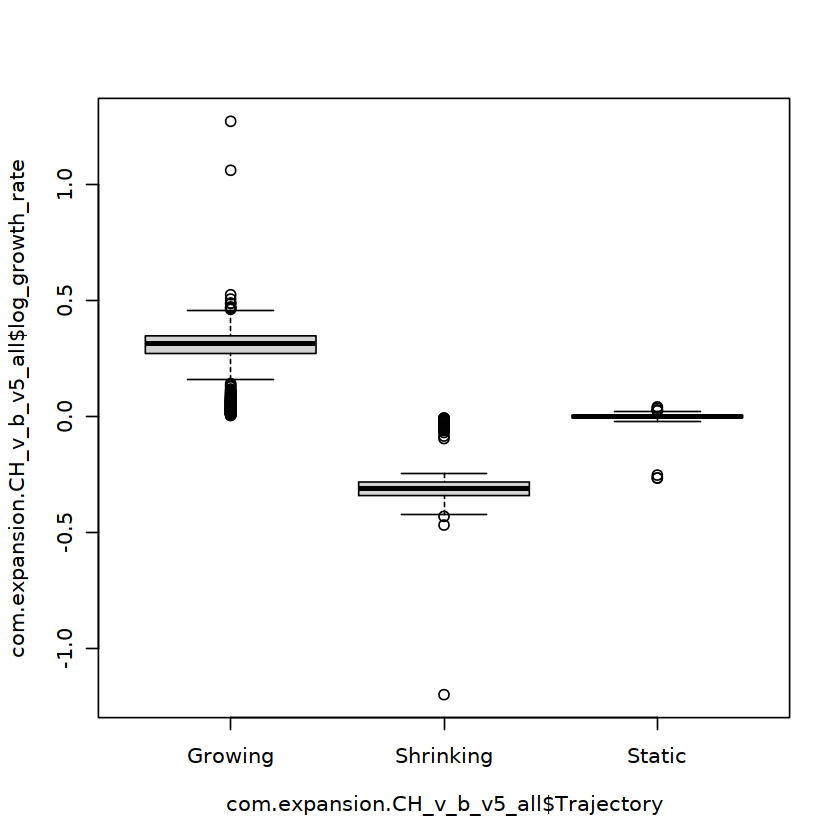

In [266]:
boxplot(com.expansion.CH_v_b_v5_all$log_growth_rate ~ com.expansion.CH_v_b_v5_all$Trajectory)

In [262]:
## incident clones
summary(com.expansion.CH_v_b_v5_all$log_growth_rate[com.expansion.CH_v_b_v5_all$Clone_status=="Incident"])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.02023 0.29827 0.32539 0.32722 0.35735 1.27467 

In [267]:
# fwrite(com.expansion.CH_v_b_v5_all, "combined.expansion.CH_v_b_v5_all.growth_rate.23Mar2023.csv", 
 #      row.names = F, col.names = T, sep=",", na = "NA")